<a href="https://colab.research.google.com/github/kakkarsaab/Titanic-Survival-Prediction-using-Decision-Trees/blob/master/Titanic_Prediction_from_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv("train.csv")

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
#dropping the columns which are not necessary
columns_to_drop = ["PassengerId","Name","Cabin","Ticket","Embarked"]

In [0]:
data_clean =df.drop(columns_to_drop,axis=1)

In [15]:
#Showing the cleaned data
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [0]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

data_clean["Sex"]=le.fit_transform(data_clean["Sex"])


In [17]:
data_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [0]:
data_clean = data_clean.fillna(data_clean['Age'].mean())

In [19]:
data_clean.loc[2]

Survived     1.000
Pclass       3.000
Sex          0.000
Age         26.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 2, dtype: float64

In [20]:
input_cols = ['Pclass',"Sex","Age","SibSp","Parch","Fare"]
output_cols = ["Survived"]

X = data_clean[input_cols]
Y = data_clean[output_cols]

print(X.shape,Y.shape)
print(type(X))

(891, 6) (891, 1)
<class 'pandas.core.frame.DataFrame'>


In [0]:
#Define Information Gain & Entropy


In [0]:
def entropy(col):

  counts= np.unique(col,return_counts=True)
  N= float(col.shape[0])

  ent=0.0
  for ix in counts[1]:
    p=ix/N
    ent += (-1.0*p*np.log2(p))
    return ent


In [0]:
def divide_data(x_data,fkey,fval):
    #Work with Pandas Data Frames
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([],columns=x_data.columns)
    
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        
        if val > fval:
            x_right = x_right.append(x_data.loc[ix])
        else:
            x_left = x_left.append(x_data.loc[ix])
            
    return x_left,x_right

In [23]:
x_left,x_right = divide_data(data_clean[:10],'Sex',0.5)
print(x_left)
print(x_right)

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
1       1.0     1.0  0.0  38.0    1.0    0.0  71.2833
2       1.0     3.0  0.0  26.0    0.0    0.0   7.9250
3       1.0     1.0  0.0  35.0    1.0    0.0  53.1000
8       1.0     3.0  0.0  27.0    0.0    2.0  11.1333
9       1.0     2.0  0.0  14.0    1.0    0.0  30.0708
   Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0       0.0     3.0  1.0  22.000000    1.0    0.0   7.2500
4       0.0     3.0  1.0  35.000000    0.0    0.0   8.0500
5       0.0     3.0  1.0  29.699118    0.0    0.0   8.4583
6       0.0     1.0  1.0  54.000000    0.0    0.0  51.8625
7       0.0     3.0  1.0   2.000000    3.0    1.0  21.0750


In [0]:
def information_gain(x_data,fkey,fval):
    
    left,right = divide_data(x_data,fkey,fval)
    
    #% of total samples are on left and right
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    
    #All examples come to one side!
    if left.shape[0] == 0 or right.shape[0] ==0:
        return -1000000 #Min Information Gain
    
    i_gain = entropy(x_data.Survived) - (l*entropy(left.Survived)+r*entropy(right.Survived))
    return i_gain

In [25]:
# Test our function
for fx in X.columns:
    print(fx)
    print(information_gain(data_clean,fx,data_clean[fx].mean()))

Pclass
0.02961754532364458
Sex
0.09409671200231373
Age
0.0004467595454610285
SibSp
0.003814989560021409
Parch
0.006340453640985122
Fare
0.018173481486616072


In [0]:

class DecisionTree:
    
    #Constructor
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train(self,X_train):
        
        features = ['Pclass','Sex','Age','SibSp', 'Parch', 'Fare']
        info_gains = []
        
        for ix in features:
            i_gain = information_gain(X_train,ix,X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        print("Making Tree Features is",self.fkey)
        
        #Split Data
        data_left,data_right = divide_data(X_train,self.fkey,self.fval)
        data_left = data_left.reset_index(drop=True)
        data_right = data_right.reset_index(drop=True)
         
        #Truly a left node
        if data_left.shape[0]  == 0 or data_right.shape[0] ==0:
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        #Stop earyly when depth >=max depth
        if(self.depth>=self.max_depth):
            if X_train.Survived.mean() >= 0.5:
                self.target = "Survive"
            else:
                self.target = "Dead"
            return
        
        #Recursive Case
        self.left = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(data_right)
        
        #You can set the target at every node
        if X_train.Survived.mean() >= 0.5:
            self.target = "Survive"
        else:
            self.target = "Dead"
        return
    
    def predict(self,test):
        if test[self.fkey]>self.fval:
            #go to right
            if self.right is None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left is None:
                return self.target
            return self.left.predict(test)

# **Train-Validation-Test Set Split**

In [0]:
split = int(0.7*data_clean.shape[0])
train_data = data_clean[:split]
test_data = data_clean[split:]
test_data = test_data.reset_index(drop=True)

In [33]:
print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [0]:
dt = DecisionTree()

In [35]:
dt.train(train_data)


Making Tree Features is Sex
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is SibSp
Making Tree Features is Parch
Making Tree Features is Pclass
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is Age
Making Tree Features is Pclass
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is SibSp
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Age
Making Tree Features is Parch
Making Tree Features is Fare
Making Tree Features is Parch
Making Tree Features is SibSp
Making Tree Features is Age
Making Tree Features is Fare
Making Tree Features is Parch
Making T

In [36]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.right.fkey)

Sex
0.6292134831460674
Pclass
Fare


In [0]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [38]:
y_pred

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'Survive',
 'Dead',
 'Dead',
 'Survive',
 'Dead',
 'Dead',
 'Dead',
 'Survive',
 'De

In [0]:
y_actual = test_data[output_cols]

In [0]:
le = LabelEncoder()
y_pred = le.fit_transform(y_pred)

In [41]:
print(y_pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0]


In [42]:
y_pred = np.array(y_pred).reshape((-1,1))
print(y_pred.shape)

(268, 1)


In [0]:
acc = np.sum(y_pred==y_actual)/y_pred.shape[0]

In [44]:
acc = np.sum(np.array(y_pred)==np.array(y_actual))/y_pred.shape[0]
print(acc)

0.8171641791044776


# **Visualise a Decison Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
sk_tree = DecisionTreeClassifier(criterion='gini',max_depth=5)

In [54]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
import pydotplus

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [0]:
dot_data = StringIO()
export_graphviz(sk_tree,out_file=dot_data,filled=True,rounded=True)

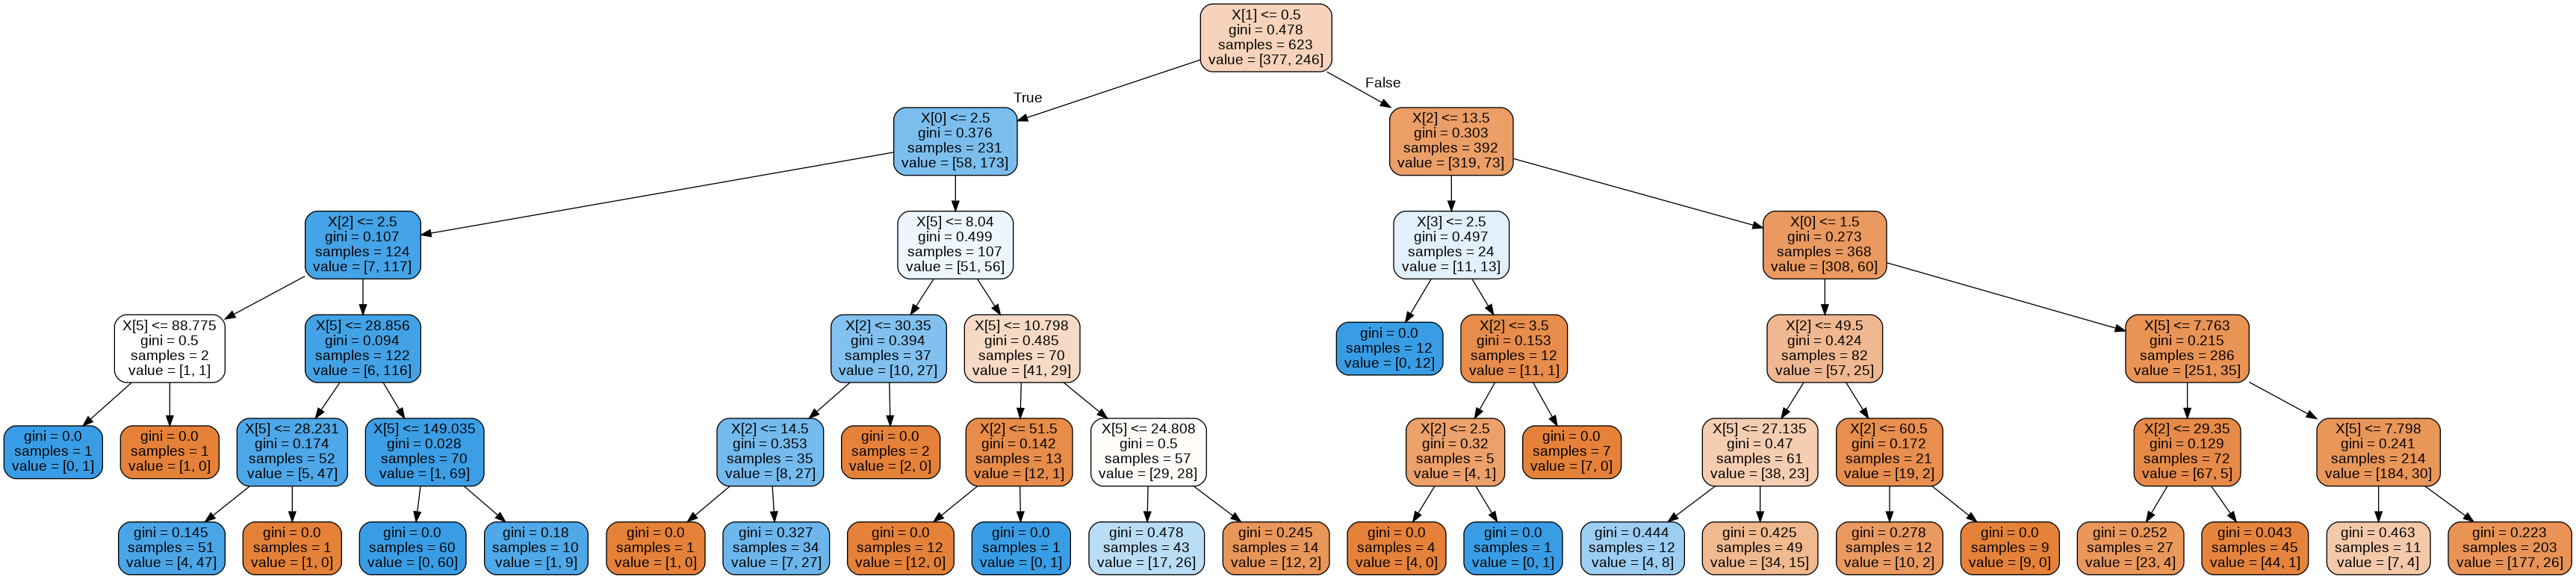

In [57]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())